In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

In [32]:
train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [9]:
Y = train["label"]
train = train.drop(columns="label", axis=1)

In [14]:
train.isnull().sum().any()

False

In [15]:
test.isnull().sum().any()

False

In [16]:
train /= 255
test /= 255

In [18]:
import seaborn as sns

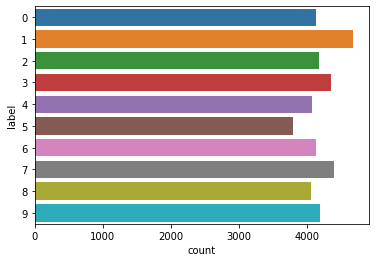

In [28]:
sns.countplot(y=Y);

In [29]:
train = train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [33]:
from keras.utils.np_utils import to_categorical

In [34]:
Y = to_categorical(Y, num_classes=10)

In [38]:
Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [40]:
Y.shape

(42000, 10)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_val, y_train, y_val = train_test_split(train, Y, test_size=.15)

In [45]:
import matplotlib.pyplot as plt

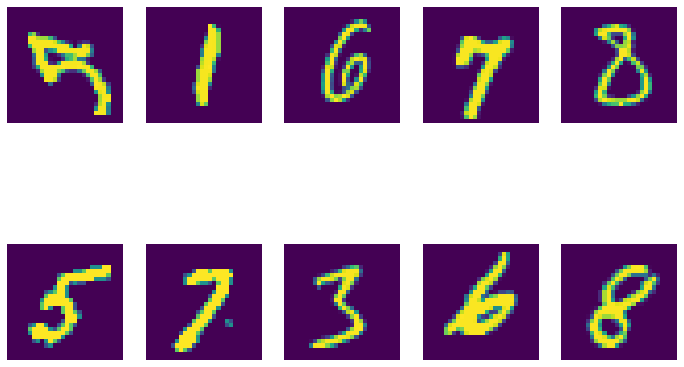

In [50]:
fig = plt.figure(figsize=(12, 8))

for i in range(10):
    fig.add_subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis("off")

 ## Building Model

In [52]:
import tensorflow as tf

In [76]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(5, 5), padding="same",
                                activation="relu", input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=5, padding="same",
         activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.30))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [77]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                 

In [80]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=["accuracy"],
             optimizer=tf.keras.optimizers.Adamax(beta_1=0.9, beta_2=0.999,
                                                 epsilon=1e-07))

In [81]:
from keras.callbacks import ReduceLROnPlateau

In [82]:
learning_rate_reduction = ReduceLROnPlateau(monitor="val_acc",
                                           patience=3,
                                           verbose=1,
                                           factor=0.6,
                                           min_lr=0.00001)

In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [86]:
dataGen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=5,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=False,
                            vertical_flip=False)
dataGen.fit(x_train)

In [88]:
model_his = model.fit_generator(dataGen.flow(x_train, y_train, batch_size=90),
                               validation_data=(x_val, y_val),
                               steps_per_epoch=x_train.shape[0] // 90,
                               callbacks=[learning_rate_reduction],
                               epochs=25)

Epoch 1/25
  1/396 [..............................] - ETA: 44s - loss: 0.0173 - accuracy: 0.9667

C:\Users\hdotd\AppData\Local\Temp/ipykernel_16620/1761776565.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_his = model.fit_generator(dataGen.flow(x_train, y_train, batch_size=90),


396/396 [==============================] - 10s 24ms/step - loss: 0.0232 - accuracy: 0.9675 - val_loss: 0.0105 - val_accuracy: 0.9816 - lr: 0.0010
Epoch 2/25
396/396 [==============================] - 9s 23ms/step - loss: 0.0191 - accuracy: 0.9730 - val_loss: 0.0077 - val_accuracy: 0.9868 - lr: 0.0010
Epoch 3/25
396/396 [==============================] - 9s 24ms/step - loss: 0.0167 - accuracy: 0.9751 - val_loss: 0.0067 - val_accuracy: 0.9889 - lr: 0.0010
Epoch 4/25
396/396 [==============================] - 9s 23ms/step - loss: 0.0147 - accuracy: 0.9794 - val_loss: 0.0060 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 5/25
396/396 [==============================] - 9s 23ms/step - loss: 0.0132 - accuracy: 0.9810 - val_loss: 0.0066 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 6/25
396/396 [==============================] - 9s 23ms/step - loss: 0.0120 - accuracy: 0.9825 - val_loss: 0.0054 - val_accuracy: 0.9916 - lr: 0.0010
Epoch 7/25
396/396 [==============================] - 9s 23ms/step - loss:

396/396 [==============================] - 9s 23ms/step - loss: 0.0054 - accuracy: 0.9922 - val_loss: 0.0040 - val_accuracy: 0.9940 - lr: 0.0010
Epoch 22/25
396/396 [==============================] - 9s 23ms/step - loss: 0.0051 - accuracy: 0.9926 - val_loss: 0.0041 - val_accuracy: 0.9944 - lr: 0.0010
Epoch 23/25
396/396 [==============================] - 10s 24ms/step - loss: 0.0050 - accuracy: 0.9931 - val_loss: 0.0041 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 24/25
396/396 [==============================] - 9s 23ms/step - loss: 0.0049 - accuracy: 0.9931 - val_loss: 0.0035 - val_accuracy: 0.9946 - lr: 0.0010
Epoch 25/25
396/396 [==============================] - 9s 24ms/step - loss: 0.0047 - accuracy: 0.9934 - val_loss: 0.0038 - val_accuracy: 0.9943 - lr: 0.0010


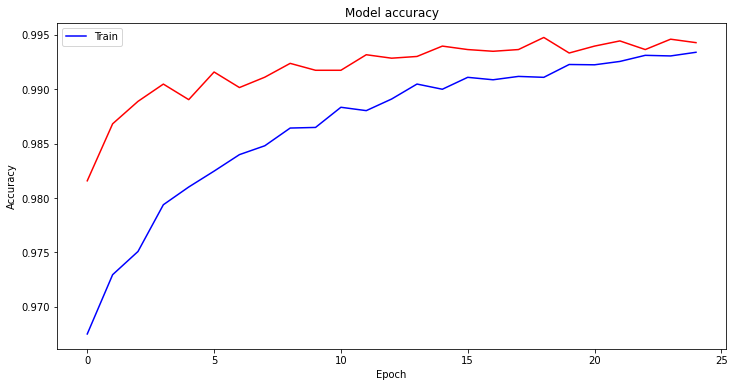

In [110]:
fig = plt.figure(figsize=(12, 6))
plt.plot(model_his.history['accuracy'],color='b', label="Training accuracy")
plt.plot(model_his.history['val_accuracy'],color='r', label="Validation accuracy")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')
plt.show()

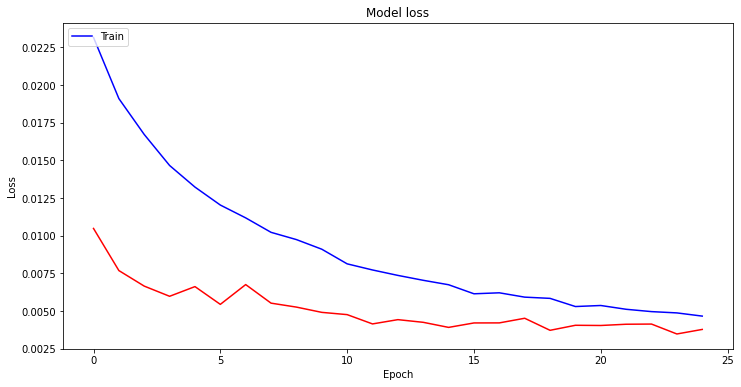

In [114]:
fig = plt.figure(figsize=(12, 6))
plt.plot(model_his.epoch,model_his.history['loss'],color='b', label="Training loss")
plt.plot(model_his.epoch,model_his.history['val_loss'],color='r', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')
plt.show()

In [115]:
y_preds = model.predict(x_val)

In [118]:
y_pred_classes = np.argmax(y_preds, axis=1)

In [122]:
y_pred_classes

array([6, 6, 0, ..., 0, 5, 2], dtype=int64)

In [123]:
y_true = np.argmax(y_val, axis = 1)

In [124]:
from sklearn.metrics import confusion_matrix

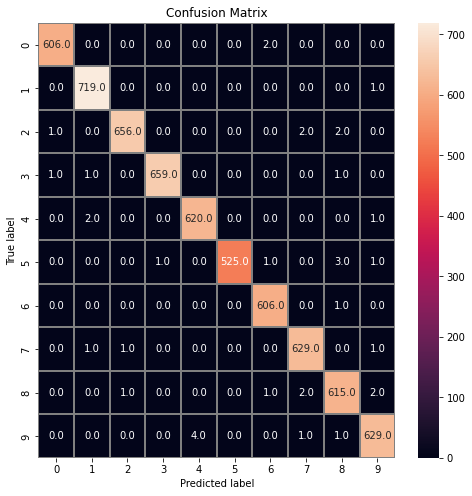

In [127]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,
            linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [128]:
eva = model.evaluate(x_val, y_val)

197/197 [==============================] - 1s 5ms/step - loss: 0.0038 - accuracy: 0.9943


In [129]:
eva

[0.003778688609600067, 0.9942857027053833]